# Notebook For Feature Extraction : Signboards + Lanes

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

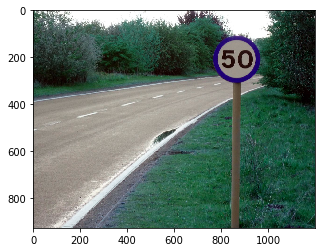

In [2]:
img = cv2.imread(r'C:\Users\nishc_omjn2ty\Downloads\trial.jpg')
plt.imshow(img)
img = cv2.resize(img,(500,400))
#img = cv2.cvtColor(img, cv2.COLOR_BGR2BW)

# Custom filter implementation
Refer for filters: https://setosa.io/ev/image-kernels/ 

In [3]:
kernel= np.array([[0.6, 2, 0.7],[0, 0 ,0],[-0.5, -2.1, -1]])

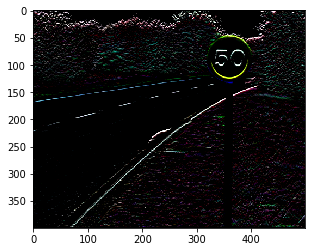

In [4]:
filtered_img = cv2.filter2D(img, -1, kernel)
plt.imshow(filtered_img)

# Function to extract circles
### Used here to extract circular sign boards!


In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output=img
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100, maxRadius=50 )
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
    mask = np.full((output.shape[0],output.shape[1]),0,dtype=np.uint8)
    for i in circles:
        cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),-1)
    fg= cv2.bitwise_or(output, output, mask=mask)
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    # show the output image
    cv2.imshow("output", np.hstack([img, output, fg]))
    cv2.waitKey(0)

# Lane co-ordinates extraction

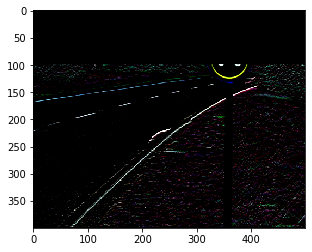

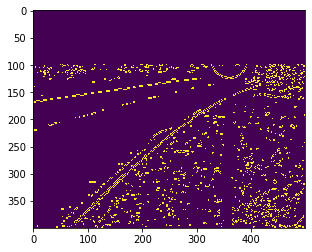

In [6]:
#Function to crop the filtered_image
#Canny Edge detection applied 

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, 400 ),
    (0, 100),
    (500,100),
    (500, 400),
]
cropped_image = region_of_interest(
    filtered_img,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()
plt.imshow(cropped_image)
# Convert to grayscale here.
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
# Call Canny Edge Detection here.
cannyed_image = cv2.Canny(gray_image, 100, 200)
plt.figure()
plt.imshow(cannyed_image)
plt.show()

In [7]:
#Co-ordinates of the lines found
#HoughLine Transform applied

lines = cv2.HoughLinesP(
    cannyed_image,
    rho=3,
    theta=np.pi / 360,
    threshold=400,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=35
)
print(lines)

[[[ 37 161 307 125]]

 [[ 74 390 305 182]]]


In [8]:
#Function to superimpose the lines found on filtered image

def draw_lines(img, lines, color=[255, 255, 255], thickness=3):
    # If there are no lines to draw, exit.
    if lines is None:
            return
    # Make a copy of the original image.
    img = np.copy(img)
    # Create a blank image that matches the original in size.
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8,
    )
    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    plt.imshow(line_img)
    plt.show()
    img= cv2.addWeighted(img, 0.8,line_img, 1, 0)
    # Return the modified image.
    return img

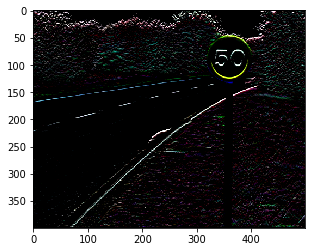

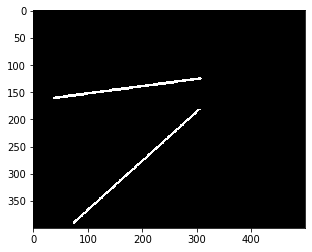

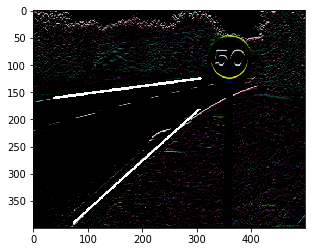

In [9]:
#Driving Code for the above process

plt.imshow(filtered_img)
plt.show()
line_image = draw_lines(filtered_img, lines) # <---- Add this call.
plt.figure()
plt.imshow(line_image)
plt.show()

# Final Image (Lanes + Signboard)

In [12]:
#Superimposing the lanes image and traffic sign mask
vis_im = cv2.addWeighted(line_image, 0.5,fg, 0.5, 0)
vis_im = cv2.cvtColor(vis_im, cv2.COLOR_BGR2RGB)

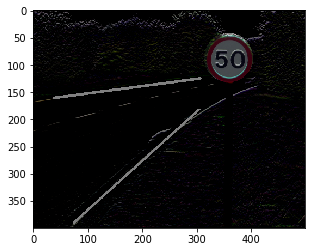

In [13]:
plt.imshow(vis_im)